In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", path)

100%|██████████| 25.6k/25.6k [00:00<00:00, 121kB/s]

Extracting files...
Path to dataset files: C:\Users\rohit\.cache\kagglehub\datasets\uciml\red-wine-quality-cortez-et-al-2009\versions\2


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [11]:
wine_dataset = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\mach_learning\Wine_prediction\winequality-red.csv")

In [12]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


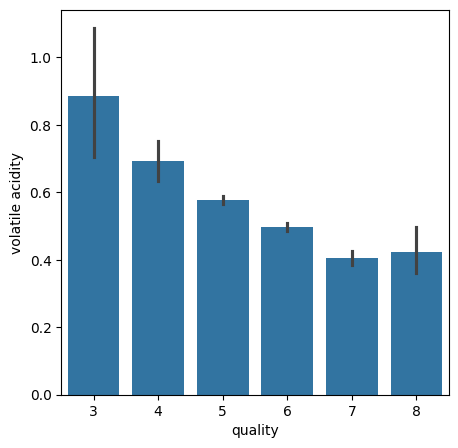

In [20]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_dataset)
plt.show()

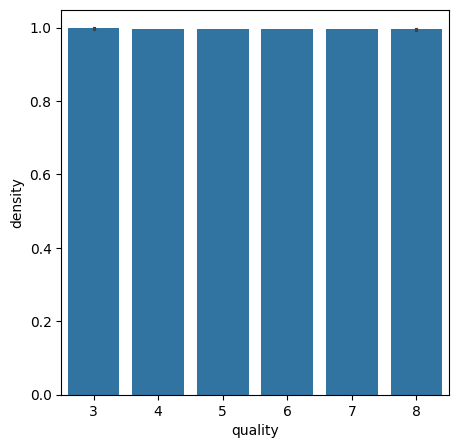

In [21]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='density',data=wine_dataset)
plt.show()

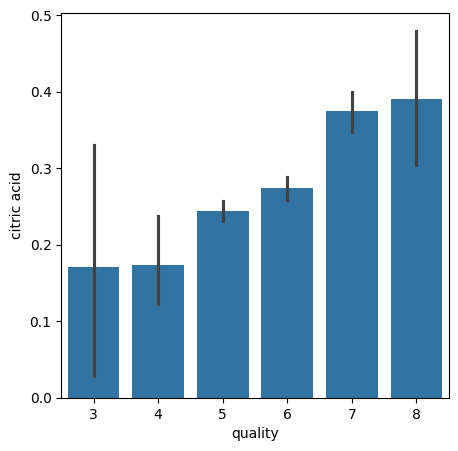

In [22]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_dataset)
plt.show()

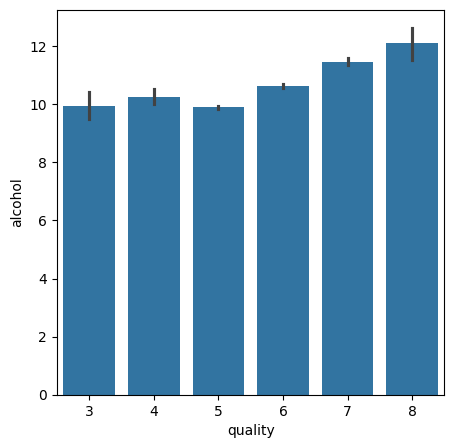

In [23]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='alcohol',data=wine_dataset)
plt.show()

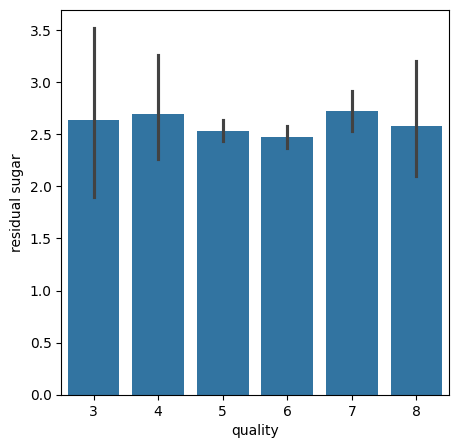

In [24]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='residual sugar',data=wine_dataset)
plt.show()

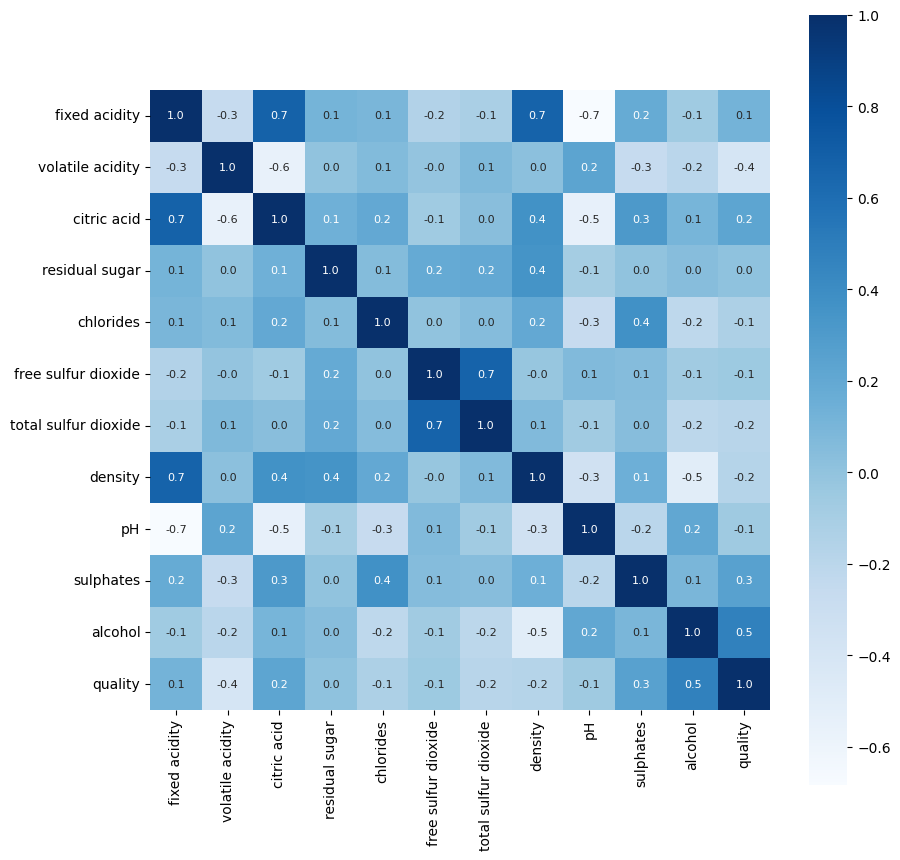

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(wine_dataset.corr() ,cbar=True, square = True, cmap='Blues',annot=True,annot_kws={'size':8},fmt='.1f')
plt.show()

In [27]:
X = wine_dataset.drop('quality',axis=1)

In [29]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [30]:
# Lable Binarization
# If quality>=7 then good(1) else bad(0)
# we are converting this into a classification problem
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [33]:
Y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [38]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
training_data_prediction = rf_model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, training_data_prediction)
print("Accuracy on training data : ", training_data_accuracy)

Accuracy on training data :  1.0


In [41]:
test_data_prediction = rf_model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, test_data_prediction)
print("Accuracy on test data : ", test_data_accuracy)

Accuracy on test data :  0.9375


In [42]:
# Save trained RandomForest model to disk for GUI use
import pickle

with open('wine_quality_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print('Saved wine_quality_model.pkl')

Saved wine_quality_model.pkl
